### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import re
import string
from nltk.util import bigrams, ngrams
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob


In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import CountVectorizer


### Reading the dataFrame

In [3]:
df = pd.read_csv('tweets.csv')[:500]
df

/var/folders/0w/k1m42p4d6q5_frkd8snkm6v80000gn/T/ipykernel_1688/514759147.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tweets.csv')[:500]


,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
496,"Tracy Krauss, #author #artist #playwright",ChatGPT is a hot topic; there is no doubt. It ...,"British Columbia, Canada",I write modern Christian romance with a twist ...,2010-06-19 04:45:43+00:00,2718.0,1803.0,348,False,2023-05-17 16:00:37+00:00,NaN,Hootsuite Inc.
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.
498,Tweeting Monk,@Oncrawl Agreed! The #ChatGPT is definitely th...,GET 30% OFF FOR 3 MONTHS,Set your Twitter account on auto-pilot and wat...,2022-03-30 10:35:13+00:00,50.0,111.0,64,False,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk


### Removing the Duplicate rows

In [4]:
df = df.drop_duplicates()
# df

### Removing Rows With Missing Values

In [5]:
df =df.dropna(how = 'all')
# df

### Remove Line Breaks

In [6]:
def remove_line_breaks(text):
    text = text.replace('\r', ' ').replace('\n', ' ')
    return text

### Tokenization

In [7]:
text = ' '.join(df['text'])

# Tokenize into words
words = word_tokenize(text)
print(words)

# Tokenize into sentences
sentences = sent_tokenize(text)
print(sentences)


['#', 'GPT4', 'for', 'FREE', '.', 'No', 'its', 'not', 'a', 'clickbait', ',', '@', 'Qolaba', 'Studio', 'now', 'has', 'a', 'chatbot', 'powered', 'by', '#', 'ChatGPT4', 'offering', '#', 'ChatGPTplus', 'for', 'FREE', 'to', 'use', 'along', 'with', '#', 'AIart', 'generator', 'which', 'allows', 'you', 'a', '1-click', '#', 'NFT', '#', 'minting', 'to', 'make', 'the', 'most', 'of', 'your', '#', 'AIArtwork', '#', 'NFTs', '#', 'OpenAI', '#', 'OpenAIChatGPT', '#', 'chatgpt', 'AI', 'enthusiast', 'ChatGPT', 'Thinks', 'These', '5', 'Crypto', 'Coins', 'Will', 'Explode', 'This', 'Year', '-', 'Yahoo', 'Finance', '#', 'chatgpt', '#', 'AI', '#', 'openAI', 'https', ':', '//t.co/tFOdU0qnDz', 'New', ':', '@', 'JWVance', "'s", 'post', 'about', '5', '#', 'startups', '(', 'including', '@', 'VcinityInc', ')', 'that', 'won', 'the', '1st', '#', 'startup50', 'challenge', '(', 'thx', 'to', '#', 'ChatGPT', ')', ',', 'based', 'on', 'answers', 'about', 'macro-economic', 'pressures', ',', 'VC', 'funding', ',', 'track', '

### remove punctuation


In [8]:
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)

### Remove Special Characters

In [9]:
def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

### Lower Case

In [10]:
def lowercase(text):
    text_low = [token.lower() for token in word_tokenize(text)]
    return ' '.join(text_low)

### Remove StopWords

In [11]:
def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    text = " ".join([word for word in word_tokens if word not in stop])
    return text

### remove one character words


In [12]:
def remove_one_character_words(text):
    '''Remove words from dataset that contain only 1 character'''
    text_high_use = [token for token in word_tokenize(text) if len(token)>1]      
    return ' '.join(text_high_use)   
    


### Stemming

In [13]:
#%%
# Stemming with 'Snowball stemmer" package
def stem(text):
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    text_stemmed = [stemmer.stem(token) for token in word_tokenize(text)]        
    return ' '.join(text_stemmed)



### Lemmatization

In [14]:
def lemma(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = nltk.word_tokenize(text)
    text_lemma = " ".join([wordnet_lemmatizer.lemmatize(word) for word in word_tokens])       
    return ' '.join(text_lemma)




### Words Tokenization

In [15]:
def sentence_word(text):
    word_tokens = nltk.word_tokenize(text)
    return word_tokens


### Sentence Tokenization

In [16]:
def paragraph_sentence(text):
    sent_token = nltk.sent_tokenize(text)
    return sent_token    

### Remove Numbers

In [17]:
def remove_numbers(text):
    no_nums = re.sub(r'\d+', '', text)
    return ''.join(no_nums)

### URLs Removal

In [18]:
def RemoveURLs(text):
    pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    urls = re.sub(pattern,'', text)
    return ''.join(urls)

### Running All The Function in One Go

In [19]:
text = remove_line_breaks(text)
text=remove_one_character_words(text)
text=remove_special_characters(text)
text = lowercase(text)
text = remove_stopwords(text)
text = remove_punctuation(text)
text = stem(text)
text = remove_numbers(text)
text = RemoveURLs(text)

### Final Output After all the Preprocessing

In [20]:
text

'gpt free clickbait qolaba studio chatbot power chatgpt offer chatgptplus free use along aiart generat allow click nft mint make aiartwork nfts openai openaichatgpt chatgpt ai enthusiast chatgpt think crypto coin explod year yahoo financ chatgpt ai openai https tcotfoduqndz new jwvanc post startup includ vcinityinc st startup challeng thx chatgpt base answer macroeconom pressur vc fund track record manag team amp growth potenti market sector https tcojxgamjh get binanc spot recommend short ticker ghstusdt time interv min last price  rsi  power chatgpt ghst ghst alphaquarktoken gon na long wait short https tcoqiqgttaa caught web digit age could use superhero hero chatgpt seamless navig data predict outcom share knowledg sound like superhero materi take chatgpt https tconbkggivc video show compani logo base websit domain short https tcoswognqbea get companylogo api chatgpt https tcovslbwtatfx use cerberusgpt hologeneticslab simul hologenet digitalorgan supercomput creat intern revis syst

### Bigrams

In [21]:
tokens = word_tokenize(text)
bigram_tokens = list(bigrams(tokens))
fdist = FreqDist(bigram_tokens)

print("Most Common Bigrams:")
for bigram, freq in fdist.most_common():
    print(bigram, ":", freq)

Most Common Bigrams:
('chatgpt', 'https') : 70
('ai', 'chatgpt') : 49
('chatgpt', 'ai') : 43
('power', 'chatgpt') : 30
('chatgpt', 'openai') : 29
('openai', 'chatgpt') : 27
('use', 'chatgpt') : 27
('chatgpt', 'chatgpt') : 24
('openai', 'https') : 23
('last', 'price') : 20
('price', 'rsi') : 20
('rsi', 'power') : 20
('recommend', 'short') : 18
('short', 'ticker') : 18
('short', 'https') : 18
('gon', 'na') : 17
('ai', 'https') : 17
('ai', 'openai') : 16
('chatgpt', 'plugin') : 16
('gpt', 'chatgpt') : 16
('binanc', 'spot') : 15
('spot', 'recommend') : 15
('time', 'interv') : 15
('interv', 'min') : 15
('min', 'last') : 15
('na', 'long') : 15
('long', 'wait') : 15
('wait', 'short') : 15
('chatgpt', 'generativeai') : 13
('ai', 'generativeai') : 11
('artifici', 'intellig') : 11
('generativeai', 'https') : 11
('like', 'chatgpt') : 10
('chatgpt', 'gpt') : 10
('chatgpt', 'prompt') : 10
('generat', 'ai') : 10
('openai', 'ai') : 10
('ai', 'artificialintellig') : 9
('ask', 'chatgpt') : 9
('artifici

### Trigrams

In [22]:
trigramList = []
freqList = []
trigram_tokens = list(ngrams(tokens, 3))
fdist = FreqDist(trigram_tokens)
print("Most Common Trigrams:")
for trigram, freq in fdist.most_common():
    trigramList.append(trigram)
    freqList.append(freq)
    print(trigram, ":", freq)

Most Common Trigrams:
('last', 'price', 'rsi') : 20
('price', 'rsi', 'power') : 20
('rsi', 'power', 'chatgpt') : 20
('recommend', 'short', 'ticker') : 18
('chatgpt', 'ai', 'openai') : 15
('ai', 'openai', 'https') : 15
('binanc', 'spot', 'recommend') : 15
('spot', 'recommend', 'short') : 15
('time', 'interv', 'min') : 15
('interv', 'min', 'last') : 15
('min', 'last', 'price') : 15
('gon', 'na', 'long') : 15
('na', 'long', 'wait') : 15
('long', 'wait', 'short') : 15
('wait', 'short', 'https') : 15
('ai', 'chatgpt', 'https') : 9
('chatgpt', 'openai', 'ai') : 9
('chatgpt', 'generativeai', 'https') : 8
('sell', 'binanc', 'spot') : 7
('gpt', 'chatgpt', 'openai') : 7
('openai', 'ai', 'generativeai') : 7
('ai', 'generativeai', 'microsoft') : 7
('generativeai', 'microsoft', 'googl') : 7
('microsoft', 'googl', 'autogpt') : 7
('testconqu', 'chatgpt', 'midjourney') : 6
('mvpbuzz', 'rdbuzz', 'boston') : 6
('rdbuzz', 'boston', 'hls') : 6
('boston', 'hls', 'chatgpt') : 6
('hls', 'chatgpt', 'generativ

In [23]:
for_plt = dict(zip(trigramList, freqList))

ValueError: input operand has more dimensions than allowed by the axis remapping

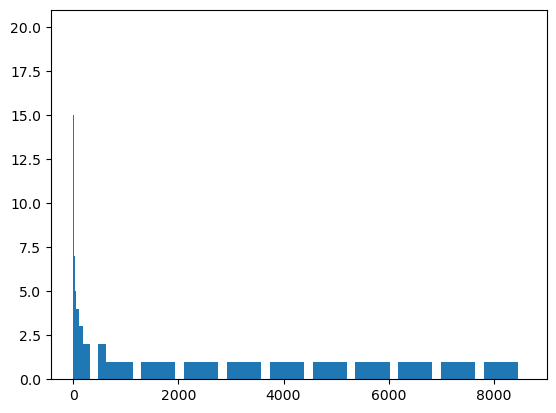

In [24]:
names = list(for_plt.keys())
values = list(for_plt.values())

plt.bar(range(len(for_plt)), values, tick_label=names)
plt.show()

### Word CLoud

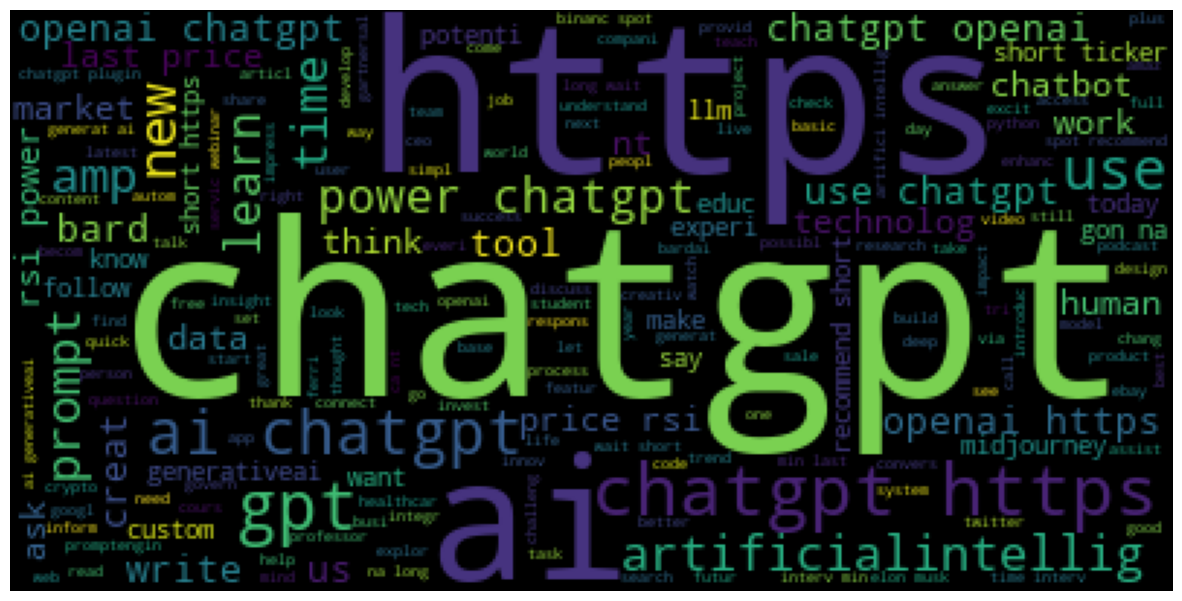

In [25]:
word_cloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=300).generate(text)
plt.figure(figsize=(15, 20))
plt.clf()
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### Sentiment Analysis 

In [26]:
for i in range(len(df['text'])):

    # Example text
    tweet = df['text'][i]

    # Initialize the SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()

    # Get the sentiment scores for the text
    sentiment_scores = sid.polarity_scores(tweet)

    # Print the sentiment scores
    print("Sentiment Scores:")
    print(sentiment_scores)

    # Determine the overall sentiment label based on the compound score
    if sentiment_scores['compound'] >= 0.05:
        sentiment_label = 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'

    print("Sentiment Label:", sentiment_label)

Sentiment Scores:
{'neg': 0.042, 'neu': 0.804, 'pos': 0.154, 'compound': 0.7824}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment Label: Neutral
Sentiment Scores:
{'neg': 0.051, 'neu': 0.727, 'pos': 0.222, 'compound': 0.7783}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment Label: Neutral
Sentiment Scores:
{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.857}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment Label: Neutral
Sentiment Scores:
{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'compound': 0.5423}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment Label: Neutral
Sentiment Scores:
{'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.5423}
Senti

Sentiment Scores:
{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6997}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.5756}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment Label: Neutral
Sentiment Scores:
{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.8016}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment Label: Neutral
Sentiment Scores:
{'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'compound': 0.9847}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.5411}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.125, 'neu': 0.8, 'pos': 0.074, 'compound': -0.5754}
Sentiment Label: Negative
Sentiment Scores:
{'neg': 0.119, 'neu': 0.777, 'pos': 0.104, 'compound': -0.1779}
Sentiment Label: Negative
Sentiment Scores:
{'neg': 0.0, 'neu': 0.907, 'pos': 0.093, 'compoun

Sentiment Scores:
{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment Label: Neutral
Sentiment Scores:
{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.4754}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.044, 'neu': 0.79, 'pos': 0.166, 'compound': 0.7096}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.7992}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment Label: Neutral
Sentiment Scores:
{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.4753}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'compound': 0.7206}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'compound': 0.5994}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.133, 'neu': 0.667, 'pos': 0.2, 'compound': 0

Sentiment Scores:
{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.6486}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.11, 'neu': 0.723, 'pos': 0.167, 'compound': 0.3578}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.4926}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'compound': -0.5719}
Sentiment Label: Negative
Sentiment Scores:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment Label: Neutral
Sentiment Scores:
{'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.8516}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.073, 'neu': 0.833, 'pos': 0.094, 'compound': 0.2023}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.075, 'neu': 0.769, 'pos': 0.156, 'compound': 0.34}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.031, 'neu': 0.785, 'pos': 0.183, 'compound': 0.64}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 

Sentiment Scores:
{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.7345}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment Label: Neutral
Sentiment Scores:
{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4019}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.048, 'neu': 0.831, 'pos': 0.12, 'compound': 0.4767}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.9346}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'compound': 0.1513}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment Label: Neutral
Sentiment Scores:
{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.5859}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.8689}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.121, 'neu': 0.637, 'pos': 0.242, 'compound

Sentiment Scores:
{'neg': 0.062, 'neu': 0.783, 'pos': 0.156, 'compound': 0.7506}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.3612}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.151, 'neu': 0.789, 'pos': 0.06, 'compound': -0.4678}
Sentiment Label: Negative
Sentiment Scores:
{'neg': 0.0, 'neu': 0.943, 'pos': 0.057, 'compound': 0.3404}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.8146}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.9431}
Sentiment Label: Positive
Sentiment Scores:
{'neg': 0.0, 'neu': 0.937, 'pos': 0.063, 'compound': 0.3612}
Sentiment Label: Positive


In [27]:
analyser=SentimentIntensityAnalyzer()
scores=[]
for i in range(len(df['text'])):
    score=analyser.polarity_scores(df['text'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df['sentiment']=pd.Series(np.array(sentiment))

In [28]:
df['sentiment']

0      Positive
1      Positive
2       Neutral
3      Positive
4       Neutral
         ...   
495    Negative
496    Positive
497    Positive
498    Positive
499    Positive
Name: sentiment, Length: 500, dtype: object

### Sentiment Analysis Using TextBLob

In [29]:
for i in range(len(df['text'])):
    data = TextBlob(df['text'][i])
    print(data.sentiment)
    if data.sentiment[0] > 0:
        print('Positive Tweet')
    elif data.sentiment[0] < 0:
        print('Negative Tweet')
    elif data.sentiment[0]== 0:
        print('Neutral Tweet')

Sentiment(polarity=0.43333333333333335, subjectivity=0.7000000000000001)
Positive Tweet
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral Tweet
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral Tweet
Sentiment(polarity=0.06818181818181818, subjectivity=0.7272727272727273)
Positive Tweet
Sentiment(polarity=0.0, subjectivity=0.18333333333333332)
Neutral Tweet
Sentiment(polarity=0.16666666666666666, subjectivity=0.16666666666666666)
Positive Tweet
Sentiment(polarity=0.0, subjectivity=0.3)
Neutral Tweet
Sentiment(polarity=-0.041666666666666664, subjectivity=0.4583333333333333)
Negative Tweet
Sentiment(polarity=0.0, subjectivity=0.18333333333333332)
Neutral Tweet
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral Tweet
Sentiment(polarity=0.0, subjectivity=0.18333333333333332)
Neutral Tweet
Sentiment(polarity=0.1, subjectivity=0.1)
Positive Tweet
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral Tweet
Sentiment(polarity=-0.3, subjectivity=0.3)
Negative Tweet
Sentiment(polarity=0.0, subjectivi

### Sentiment Analysis Using RoBERT

In [30]:
!pip install transformers
!pip install scipy

##### load model and tokenizer


In [31]:
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']

In [32]:
tweet_words = []
for i in range(100):
    for word in df['text'][i].split(' '):
        if word.startswith('@') and len(word) > 1:
            word = '@user'

        elif word.startswith('http'):
            word = "http"
        tweet_words.append(word)

    tweet_proc = " ".join(tweet_words)
    print(tweet_proc)
    encoded_tweet = tokenizer(tweet_proc, return_tensors='pt')
    print(encoded_tweet)

#GPT4 for FREE. 
No its not a clickbait, @user Studio now has a chatbot powered by #ChatGPT4 offering #ChatGPTplus for FREE to use along with #AIart generator which allows you a 1-click #NFT #minting to make the most of your #AIArtwork 
#NFTs #OpenAI #OpenAIChatGPT  #chatgpt
{'input_ids': tensor([[    0, 10431,   534, 10311,   306,    13,  5198,     4,  1437, 50118,
          3084,    63,    45,    10,  3753,   428,  5236,     6,   787, 12105,
         11523,   122,    34,    10,  7359, 12749,  8852,    30,   849, 29665,
           534, 10311,   306,  1839,   849, 29665,   534, 10311,  7269,    13,
          5198,     7,   304,   552,    19,   849, 15238,  2013, 22538,    61,
          2386,    47,    10,   112,    12, 23008,   849,   487, 11615,   849,
         30732,   154,     7,   146,     5,   144,     9,   110,   849, 15238,
         23295,  6014,  1437, 50118, 10431,   487, 11615,    29,   849, 25266,
         15238,   849, 25266, 15238, 29665,   534, 10311,  1437,   849, 29465,

{'input_ids': tensor([[    0, 10431,   534,  ..., 10311,  2054,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]])}
#GPT4 for FREE. 
No its not a clickbait, @user Studio now has a chatbot powered by #ChatGPT4 offering #ChatGPTplus for FREE to use along with #AIart generator which allows you a 1-click #NFT #minting to make the most of your #AIArtwork 
#NFTs #OpenAI #OpenAIChatGPT  #chatgpt AI enthusiast ChatGPT Thinks These 5 Crypto Coins Will Explode This Year - Yahoo Finance #chatgpt #AI #openAI http New: @user post about 5 #startups (including @user that won the 1st #startup50 challenge (thx to #ChatGPT), based on answers about macro-economic pressures, VC funding, track record of management team &amp; growth potential of the market sector.  http 🚨Get Out!🚨
💰#Binance Spot💰
⬇ Recommendation: #Short 🔴
Ticker:  #GHSTUSDT
Time Interval:  5min
Last Price: 0.956
🔴 RSI: 88.3

Powered by #ChatGPT

$GHST
#GHST
#AlphaQuarkToken
#저스트

What are you gonna do?
👇LONG        👇WAIT       

{'input_ids': tensor([[    0, 10431,   534,  ...,  9162,  2054,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]])}
#GPT4 for FREE. 
No its not a clickbait, @user Studio now has a chatbot powered by #ChatGPT4 offering #ChatGPTplus for FREE to use along with #AIart generator which allows you a 1-click #NFT #minting to make the most of your #AIArtwork 
#NFTs #OpenAI #OpenAIChatGPT  #chatgpt AI enthusiast ChatGPT Thinks These 5 Crypto Coins Will Explode This Year - Yahoo Finance #chatgpt #AI #openAI http New: @user post about 5 #startups (including @user that won the 1st #startup50 challenge (thx to #ChatGPT), based on answers about macro-economic pressures, VC funding, track record of management team &amp; growth potential of the market sector.  http 🚨Get Out!🚨
💰#Binance Spot💰
⬇ Recommendation: #Short 🔴
Ticker:  #GHSTUSDT
Time Interval:  5min
Last Price: 0.956
🔴 RSI: 88.3

Powered by #ChatGPT

$GHST
#GHST
#AlphaQuarkToken
#저스트

What are you gonna do?
👇LONG        👇WAIT       


## Question 5 Feature. Engineering

### Length of Sentences and Number of  Words

In [33]:
sen = len(sentences)
wor = len(words)
print("The Number of Sentences are :", sen, "\nAnd the Number of Words are :", wor)

The Number of Sentences are : 660 
And the Number of Words are : 19429


### Words starting with letter 'A'

In [34]:
for i in range(100):
    for word in df['text'][i].split(' '):
            word = word.lower()
            if word.startswith('a'):
                print(word)

a
a
along
allows
a
ai
about
answers
about
are
age,
all
a
and
a
and
an
a
as
a
are
at
an
ad
ai
are
already
as
a
a.i
a
ai
and
asked
a
and
all
about
and
ai
are
are
awesome
about
ai
ai
a
at
ai
and
a
and
anyone
at
ascii
article
and
article
and
an
aired
allegation
are
and
are
are
access
a
a
ai
advice
ai-powered
a
as
app.
access
are
apps
an
and
and
about
ai
as
an
ally
adhd?
article
age
adhd
a
and
are
ai
ai
about
and
and
about
a
a
appreciate
all
about
and
as
as
and
and
and
appsec's
a
ai
attention!
ai?
#technology
access
a
as
a
a
about
and
and
about
adam
and
and
also
amazing.
two
ago
as
a
are
arrived!
and
at
and
and
adoption
ai.
also
and
adding
about
and
and
a
again!
asked
a
ai
availability
as
a
an
ai
a
are
attracting
asked
about
a
are
a
a
along
allows
a
acquired
and
ai
all
a
again.
a
are
article
a
asked
and
apart
after
a
artificial
as
at
a
am
are
a
a
away.
and
as
a
ai
as
an
a
a
along
allows
a
ai
and
at
ai
answer
asked
a
about
a
and
answer
ask
a
a
about
and
accelerate
and
an
and
a
an
after
a
a
a

### Number of Verbs

In [35]:
words = word_tokenize(text)
tagged_words = pos_tag(words)
count = 0
for i, j in tagged_words:
    if j == 'VB' or j == 'VBP':
        count = count +1
        print(i, 'is a Verb')


chatgptplus is a Verb
make is a Verb
openai is a Verb
potenti is a Verb
recommend is a Verb
use is a Verb
predict is a Verb
take is a Verb
get is a Verb
inject is a Verb
sell is a Verb
recommend is a Verb
ai is a Verb
sell is a Verb
recommend is a Verb
ai is a Verb
ai is a Verb
inform is a Verb
think is a Verb
ai is a Verb
go is a Verb
sell is a Verb
recommend is a Verb
learn is a Verb
find is a Verb
follow is a Verb
awesom is a Verb
ai is a Verb
ai is a Verb
deeplearn is a Verb
ai is a Verb
indemnifi is a Verb
gpt is a Verb
sake is a Verb
want is a Verb
quick is a Verb
save is a Verb
openai is a Verb
lasvega is a Verb
say is a Verb
https is a Verb
recommend is a Verb
get is a Verb
recommend is a Verb
ai is a Verb
grow is a Verb
ensur is a Verb
want is a Verb
ai is a Verb
ai is a Verb
ai is a Verb
ai is a Verb
fake is a Verb
ai is a Verb
imagin is a Verb
recommend is a Verb
ai is a Verb
build is a Verb
take is a Verb
link is a Verb
want is a Verb
ai is a Verb
teach is a Verb
gpt is a V

In [36]:
print('Number of Verbs: ', count)

Number of Verbs:  872


### number_of_characters

In [37]:
number_of_characters = len(text)
number_of_characters

69311

### Number of SPaces

In [38]:
for i in text:
    if i.isspace():
        count += 1
print(count)  

10733


## Q6 Vectorization

### CountVectorizer


In [39]:
text = df['text']
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)

print(vectorizer.vocabulary_)

# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'gpt4': 1659, 'for': 1504, 'free': 1526, 'no': 2485, 'its': 1990, 'not': 2494, 'clickbait': 800, 'qolaba': 2859, 'studio': 3349, 'now': 2501, 'has': 1729, 'chatbot': 735, 'powered': 2748, 'by': 639, 'chatgpt4': 739, 'offering': 2531, 'chatgptplus': 755, 'to': 3547, 'use': 3703, 'along': 297, 'with': 3868, 'aiart': 251, 'generator': 1596, 'which': 3844, 'allows': 293, 'you': 3976, 'click': 799, 'nft': 2472, 'minting': 2371, 'make': 2241, 'the': 3487, 'most': 2415, 'of': 2529, 'your': 3980, 'aiartwork': 256, 'nfts': 2475, 'openai': 2557, 'openaichatgpt': 2559, 'chatgpt': 737, 'ai': 246, 'enthusiast': 1292, 'thinks': 3507, 'these': 3498, 'crypto': 969, 'coins': 824, 'will': 3857, 'explode': 1373, 'this': 3508, 'year': 3962, 'yahoo': 3957, 'finance': 1459, 'https': 1822, 'co': 817, 'tfodu0qndz': 3477, 'new': 2466, 'jwvance': 2032, 'post': 2743, 'about': 174, 'startups': 3313, 'including': 1879, 'vcinityinc': 3737, 'that': 3485, 'won': 3879, '1st': 39, 'startup50': 3312, 'challenge': 714, 

### TfidfVectorizer

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)
vectorizer.get_feature_names_out()
print(X.shape)


(500, 4016)


### Word2Vec

In [41]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
model = Word2Vec(sentences=text, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [42]:
# Tensor FLOW NOT WORKING🥲
!pip install --upgrade tensorflow


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [43]:
import nltk
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example text data
texts = ["I really enjoyed the movie.",
         "The movie was boring and predictable.",
         "The acting in the film was exceptional."]

# Example sentiment labels
labels = [1, 0, 1]  # 1: positive, 0: negative

# Tokenize the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences to have equal length
padded_sequences = pad_sequences(sequences)

# Convert sentiment labels to numpy array
labels = np.array(labels)

# Define the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=16, input_length=padded_sequences.shape[1]),
    tf.keras.layers.SimpleRNN(units=32),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_sequences, labels, epochs=10)

# Example prediction
test_text = "The movie was fantastic!"
test_sequence = tokenizer.texts_to_sequences([test_text])
padded_test_sequence = pad_sequences(test_sequence, maxlen=padded_sequences.shape[1])
prediction = model.predict(padded_test_sequence)

if prediction[0] > 0.5:
    sentiment = 'Positive'
else:
    sentiment = 'Negative'

print("Sentiment:", sentiment)

NotFoundError: dlopen(/Users/student/anaconda3/lib/python3.9/site-packages/tensorflow-plugins/libmetal_plugin.dylib, 0x0006): symbol not found in flat namespace '__ZN10tensorflow8internal10LogMessage16VmoduleActivatedEPKci'